# Q4，5
What are the Top 50 high-frequent hashtags? What are 
the most frequent hashtags in the Top 50 most views 
videos? 


What are the Top 50 high-frequent words in the video 
headline? What are the most frequent words in the Top 
50 most views videos?

In [1]:
import pandas as pd
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt  
import matplotlib as mpl
import seaborn as sns  
import random

data = pd.read_csv('finaldata.csv')
data.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,description,region
0,0,n1WpP7iowLc,2017-11-14 00:00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,1,0dBIkQ4Mz1M,2017-11-14 00:00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,Comedy,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,CA
2,2,5qpjK5DgCt4,2017-11-14 00:00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,3,d380meD0W0M,2017-11-14 00:00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,CA
4,4,2Vv-BfVoq4g,2017-11-14 00:00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [2]:
# data = data[:5000]


In [2]:
import contractions
import nltk
import unicodedata 
import inflect  
import re
from nltk.corpus import stopwords

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)    # Split abbreviations e.g., can't -> can not; don't -> do not

def word_tokenize(text):
    """Turn text into tokens"""
    return nltk.word_tokenize(text)

def remove_non_ascii(words):    
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        # Normalise (normalize) unicode data in Python to remove umlauts, accents etc. 
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)  # \w: an alphanumeric character; \s: a whitespace character
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():   # Determine whether it is a number
            new_word = p.number_to_words(word)    # 22 -> twenty-two
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)    
    words = remove_stopwords(words)
    return words

ModuleNotFoundError: No module named 'contractions'

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [5]:

df = pd.DataFrame()

# for i in range(len(data)):
for i in range(0, len(data), 500):
    tags_words = normalize(word_tokenize(replace_contractions(data['tags'][i]))) 
    tags_sentence = ' '.join(tags_words).strip()
    
    title_words = normalize(word_tokenize(replace_contractions(data['title'][i]))) 
    title_sentence = ' '.join(title_words).strip()
    
    df = df.append(pd.DataFrame({'tags':[tags_sentence], 
                                 'title':[title_sentence],
                                 'views':data['views'][i]}), ignore_index = True)
        
df.head()

,tags,title,views
0,eminem walk water aftermathshadyinterscope rap,eminem walk water audio ft beyonce,17158579
1,posted posted posted smosh gabbie hanna gabbie...,matpat gabbie hanna ricky dillon posted,193241
2,plush bad unboxing unboxing fan mail idubbbztv...,plush bad unboxing fan mail,2649977
3,none,pop song review thunder imagine dragonsfeel st...,55192
4,trailer deadpool 20th century fox production c...,deadpool wet wet teaser,3979891


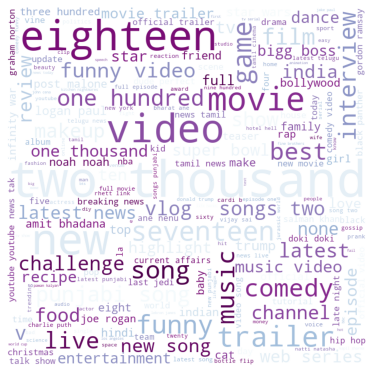

In [6]:
# Q4 高频tag
from wordcloud import WordCloud, STOPWORDS 

tags = ''
stopwords = set(STOPWORDS) 
for val in df.tags:      
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    tags += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuPu', max_words=50, max_font_size=400, min_font_size = 5).generate(tags)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [7]:
# Q4 高频tag的位置
import nltk 
word = tags.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))

[('two', 670), ('thousand', 578), ('news', 572), ('eighteen', 412), ('video', 398), ('new', 370), ('comedy', 343), ('movie', 326), ('funny', 313), ('songs', 307), ('latest', 298), ('trailer', 286), ('show', 256), ('one', 246), ('song', 227), ('videos', 220), ('live', 215), ('tv', 210), ('music', 207), ('hundred', 199), ('tamil', 174), ('youtube', 171), ('telugu', 170), ('official', 154), ('punjabi', 154), ('best', 151), ('movies', 151), ('seventeen', 147), ('vs', 142), ('game', 124), ('full', 124), ('world', 121), ('three', 118), ('black', 117), ('episode', 117), ('india', 117), ('interview', 116), ('food', 115), ('series', 114), ('makeup', 110), ('season', 109), ('review', 107), ('star', 105), ('film', 97), ('tv9', 95), ('teaser', 94), ('channel', 94), ('smith', 92), ('family', 91), ('life', 91), ('challenge', 89), ('trump', 89), ('entertainment', 89), ('super', 86), ('react', 85), ('vlog', 80), ('paul', 78), ('ten', 78), ('etv', 77), ('first', 74), ('kids', 73), ('night', 73), ('high

In [8]:
#观看量前50的视频 videos with most views
df_top50 = df.sort_values(by='views', ascending=False)[:50]
df_top50.head()

,tags,title,views
59,rewind rewind two thousand and seventeen youtu...,youtube rewind shape two thousand and seventee...,137843120
770,bighit bts bangtan fake love fake_love fake love,bts fake love official mv,111882133
702,migos walk talk walk talk walk talk drake quav...,migos walk talk ft drake,88673690
1193,luis fonsi demi lovato echame la culpa umle la...,luis fonsi demi lovato echame la culpa,80605857
359,bighit bts bangtan fake love fake_love,bts fake love official mv,65396157


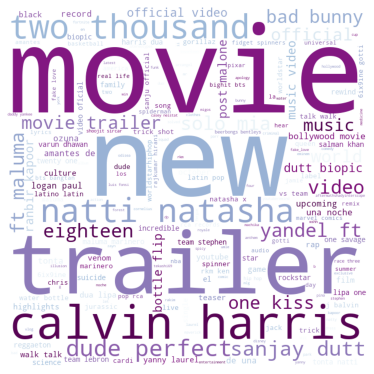

[('video', 29), ('trailer', 22), ('official', 20), ('movie', 19), ('movies', 19), ('maluma', 18), ('new', 18), ('natti', 17), ('two', 16), ('music', 16), ('dude', 16), ('calvin', 15), ('harris', 15), ('ft', 14), ('thousand', 13), ('natasha', 13), ('biopic', 13), ('perfect', 13), ('tonta', 12), ('sanjay', 12), ('dutt', 12), ('one', 11), ('bad', 11), ('bunny', 11), ('yandel', 11), ('team', 11), ('amantes', 10), ('solo', 10), ('mia', 10), ('kapoor', 10), ('eighteen', 10), ('latin', 9), ('noche', 9), ('bollywood', 9), ('marinero', 9), ('kiss', 9), ('post', 9), ('paul', 8), ('walk', 8), ('pop', 8), ('de', 8), ('ranbir', 8), ('world', 8), ('bottle', 8), ('flip', 8), ('malone', 8), ('yanny', 8), ('laurel', 8), ('6ix9ine', 8), ('logan', 7), ('stephen', 7), ('records', 7), ('una', 7), ('ozuna', 7), ('gotti', 7), ('upcoming', 7), ('youtube', 6), ('talk', 6), ('culture', 6), ('rkm', 6), ('black', 6), ('teaser', 6), ('venom', 6), ('rap', 6), ('water', 6), ('game', 6), ('dua', 6), ('lipa', 6), ('hi

In [9]:
#观看量前50的视频中的高频tag
from wordcloud import WordCloud, STOPWORDS 

tags = ''
stopwords = set(STOPWORDS) 
for val in df_top50.tags:      # 改这
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    tags += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuPu', max_words=50, max_font_size=400, min_font_size = 5).generate(tags)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#和他们的位置
import nltk 
word = tags.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))

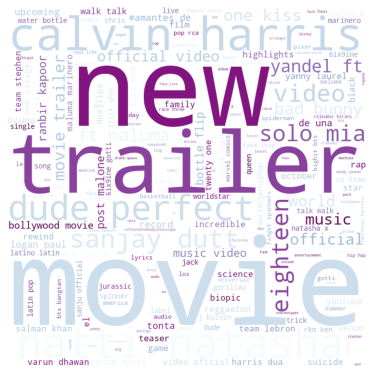

In [10]:
# Q4更新stopwords
stopwords = set(STOPWORDS)
newStopWords = ['two','thousand','seventeen','eighteen','hundred']    # delete frequent words 可以再补充
stopwords.update(newStopWords) 

tags = ''
for val in df_top50.tags:      # 用的是top 50的dataframe
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    tags += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuPu', max_words=50, max_font_size=400, min_font_size = 5).generate(tags)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#打出来
import nltk 
word = tags.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))

In [ ]:
# Q5 高频headline词云
from wordcloud import WordCloud, STOPWORDS 

title = ''
stopwords = set(STOPWORDS) 
for val in df.title:      # 把df.tages改成df.title
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    title += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuGn', max_words=50, max_font_size=400, min_font_size = 5).generate(title)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
# Q5 高频headline的位置
import nltk 
word = title.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))

In [ ]:
#播放量前50的视频的titles的高频词
from wordcloud import WordCloud, STOPWORDS 

title = ''
stopwords = set(STOPWORDS) 
for val in df_top50.title:     
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    title += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuGn', max_words=50, max_font_size=400, min_font_size = 5).generate(title)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#和他们的位置
import nltk 
word = title.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))

In [ ]:
# Q5更新stopwords
stopwords = set(STOPWORDS)
newStopWords = ['two','thousand','seventeen','eighteen','hundred']    # delete frequent words 可以再补充
stopwords.update(newStopWords) 

title = ''
for val in df_top50.title:      # 用的是top 50的dataframe
    tokens = str(val).split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()     
    title += " ".join(tokens)+" "
wordcloud = WordCloud(width = 2000, height = 2000, background_color ='white', stopwords = stopwords, 
                      colormap='BuGn', max_words=50, max_font_size=400, min_font_size = 5).generate(title)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#打出来
import nltk 
word = title.split(" ")

stopwords = nltk.corpus.stopwords.words('english')
word = [w for w in word if w not in stopwords]

text = nltk.Text(word)
fdist = nltk.FreqDist(text)
print(fdist.most_common(50))